In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from src import DATA_PATH

/home/joanna/anaconda3/envs/spatial-geo/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
def flatten_multiindex(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    gdf.columns = ['_'.join(col).strip() for col in gdf.columns.values]
    df = gdf.reset_index()
    return df

# Data

In [3]:
gdf_bikeroads = gpd.read_file(DATA_PATH / 'bikeroads.geojson')
gdf_bikeroads['length'] = gdf_bikeroads.to_crs('epsg:2180').geometry.length

gdf_bikeroads.head()

,TYP,KIERUNEK,SHAPE_LEN,geometry,length
0,droga dla pieszych i rowerów,2.0,3.435021,"LINESTRING (17.05105 51.10553, 17.05110 51.10552)",3.433479
1,droga dla pieszych i rowerów,2.0,10.438371,"LINESTRING (17.04653 51.10892, 17.04654 51.10883)",10.433692
2,droga dla pieszych i rowerów,2.0,33.520372,"LINESTRING (17.04654 51.10883, 17.04654 51.108...",33.505349
3,droga dla rowerów,2.0,161.448060,"LINESTRING (17.04657 51.11170, 17.04647 51.111...",161.375718
4,droga dla rowerów,2.0,94.881983,"LINESTRING (17.04439 51.11201, 17.04426 51.111...",94.839488


In [4]:
gdf_bikeroads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15805 entries, 0 to 15804
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   TYP        15805 non-null  object  
 1   KIERUNEK   15805 non-null  float64 
 2   SHAPE_LEN  15805 non-null  float64 
 3   geometry   15805 non-null  geometry
 4   length     15805 non-null  float64 
dtypes: float64(3), geometry(1), object(1)
memory usage: 617.5+ KB


In [5]:
gdf_bikeroads.describe()

,KIERUNEK,SHAPE_LEN,length
count,15805.000000,15805.000000,15805.000000
mean,1.905473,100.269372,100.224844
std,0.363549,155.216698,155.147808
min,0.000000,0.004219,0.004217
25%,2.000000,24.617007,24.606228
50%,2.000000,62.776507,62.748143
75%,2.000000,122.780722,122.725183
max,21.000000,5016.115927,5013.937152


In [6]:
gdf_accidents = gpd.read_file(DATA_PATH / 'accidents.geojson')
gdf_accidents = gdf_accidents.query('POJ_ROWER > 0')

gdf_accidents.head()

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,...,RDZ_NAW,STAN_NAW,SYGN,OZN_POZ,OSW,WAR_ATM,USZK_P_POJ,ROK,ShpName,geometry
10,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,twarda,sucha,brak,nie ma,światło dzienne,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (16.89646 51.13728)
40,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,twarda,mokra,brak,nie ma,światło dzienne,pochmurno,None,2013,2013_szczegoly_zdarzen_dr,POINT (17.04709 51.07854)
60,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,twarda,sucha,"jest, działa",jest,światło dzienne,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (17.02238 51.10523)
65,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (16.98138 51.12573)
77,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,twarda,sucha,brak,jest,światło dzienne,dobre warunki atmosferyczne,"ogrodzenie, inne",2013,2013_szczegoly_zdarzen_dr,POINT (17.02807 51.11838)


In [7]:
gdf_accidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2575 entries, 10 to 57721
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POJ_SUMA    2575 non-null   float64 
 1   POJ_ROWER   2575 non-null   float64 
 2   POJ_TRAM    2575 non-null   float64 
 3   POJ_BUS     2575 non-null   float64 
 4   UCZ_SUMA    2575 non-null   float64 
 5   UCZ_PIESI   2575 non-null   float64 
 6   Z_SUMA      2575 non-null   float64 
 7   Z_PIESI     2575 non-null   float64 
 8   Z_IN        2575 non-null   float64 
 9   CR_SUMA     2575 non-null   float64 
 10  CR_PIESI    2575 non-null   float64 
 11  CR_IN       2575 non-null   float64 
 12  LR_SUMA     2575 non-null   float64 
 13  LR_PIESI    2575 non-null   float64 
 14  LR_IN       2575 non-null   float64 
 15  DZIECI      2575 non-null   float64 
 16  DATA        2575 non-null   object  
 17  UL          2563 non-null   object  
 18  ADR         1693 non-null   object  
 

In [8]:
gdf_accidents.describe()

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,CR_PIESI,CR_IN,LR_SUMA,LR_PIESI,LR_IN,DZIECI
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.0,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,1.907573,1.051650,0.005825,0.013592,2.000777,0.081165,0.001942,0.0,0.001942,0.097864,0.008544,0.090874,0.146019,0.012816,0.133204,0.088155
std,0.361299,0.234985,0.076115,0.115813,0.282897,0.296336,0.044031,0.0,0.044031,0.301085,0.092054,0.291511,0.359734,0.112500,0.344403,0.293009
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,5.000000,3.000000,1.000000,0.0,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [9]:
gdf_merged = gdf_accidents.to_crs('epsg:2180').sjoin_nearest(
    gdf_bikeroads.to_crs('epsg:2180'),
    how='left',
    max_distance=30,
)

gdf_merged.head()

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,...,WAR_ATM,USZK_P_POJ,ROK,ShpName,geometry,index_right,TYP_right,KIERUNEK,SHAPE_LEN,length
10,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (352882.887 365494.167),5647.0,strefa ruchu uspokojonego 20 i 30 km/h,2.0,225.643671,225.546562
40,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,pochmurno,None,2013,2013_szczegoly_zdarzen_dr,POINT (363243.322 358674.227),6000.0,strefa ruchu uspokojonego 20 i 30 km/h,2.0,25.953008,25.941380
60,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (361592.451 361686.907),NaN,NaN,NaN,NaN,NaN
65,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (358786.182 364043.655),6715.0,droga dla rowerów,2.0,179.325925,179.246912
77,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,dobre warunki atmosferyczne,"ogrodzenie, inne",2013,2013_szczegoly_zdarzen_dr,POINT (362030.257 363138.724),11831.0,łącznik drogowy,1.0,33.695675,33.680645


In [10]:
gdf_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2604 entries, 10 to 57721
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   POJ_SUMA     2604 non-null   float64 
 1   POJ_ROWER    2604 non-null   float64 
 2   POJ_TRAM     2604 non-null   float64 
 3   POJ_BUS      2604 non-null   float64 
 4   UCZ_SUMA     2604 non-null   float64 
 5   UCZ_PIESI    2604 non-null   float64 
 6   Z_SUMA       2604 non-null   float64 
 7   Z_PIESI      2604 non-null   float64 
 8   Z_IN         2604 non-null   float64 
 9   CR_SUMA      2604 non-null   float64 
 10  CR_PIESI     2604 non-null   float64 
 11  CR_IN        2604 non-null   float64 
 12  LR_SUMA      2604 non-null   float64 
 13  LR_PIESI     2604 non-null   float64 
 14  LR_IN        2604 non-null   float64 
 15  DZIECI       2604 non-null   float64 
 16  DATA         2604 non-null   object  
 17  UL           2592 non-null   object  
 18  ADR          1703 

# Analiza danych

### Typy dróg w danych

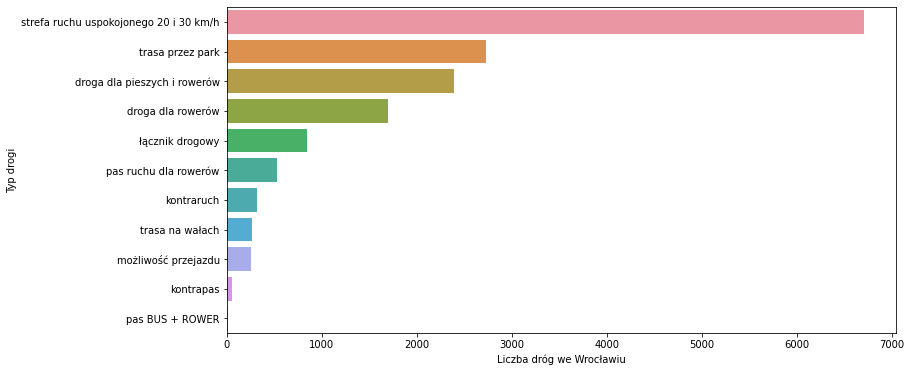

In [11]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=gdf_bikeroads,
    y='TYP',
    order=gdf_bikeroads.TYP.value_counts().index,
)
ax.set_ylabel('Typ drogi')
ax.set_xlabel('Liczba dróg we Wrocławiu')

plt.show()

### Liczba wypadków w zależności od typu drogi

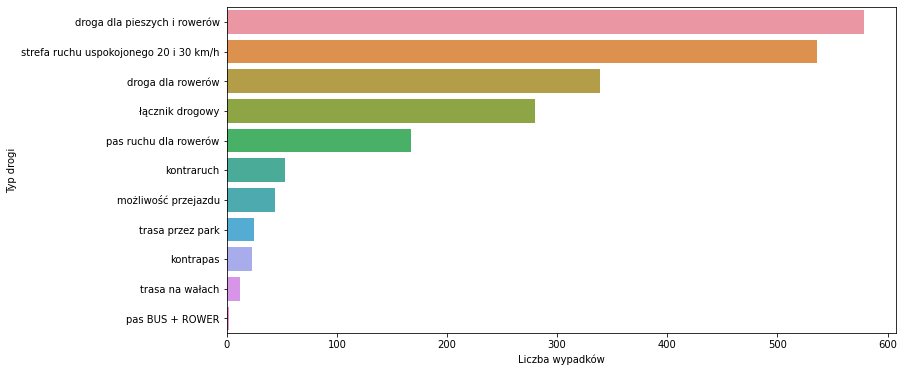

In [12]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=gdf_merged,
    y='TYP_right',
    order=gdf_merged.TYP_right.value_counts().index,
)
ax.set_ylabel('Typ drogi')
ax.set_xlabel('Liczba wypadków')

plt.show()

### Liczba wypadków pod kątem rodzaju drogi

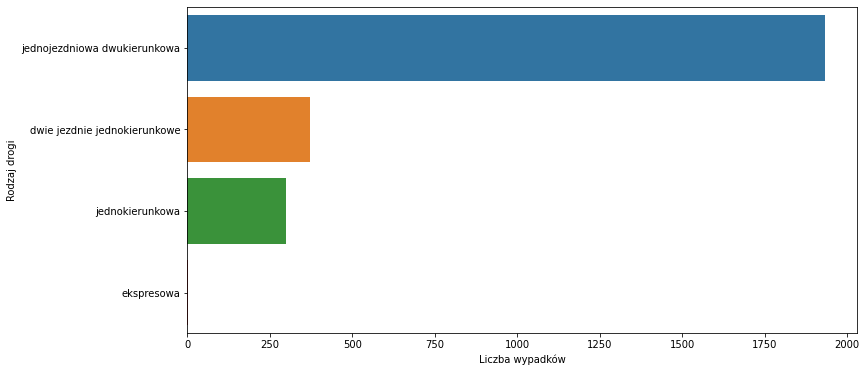

In [13]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=gdf_merged,
    y='RDZ_DR',
    order=gdf_merged.RDZ_DR.value_counts().index,
)
ax.set_ylabel('Rodzaj drogi')
ax.set_xlabel('Liczba wypadków')

plt.show()

### Najczęstsze 10 przyczyn wypadków rowerowych

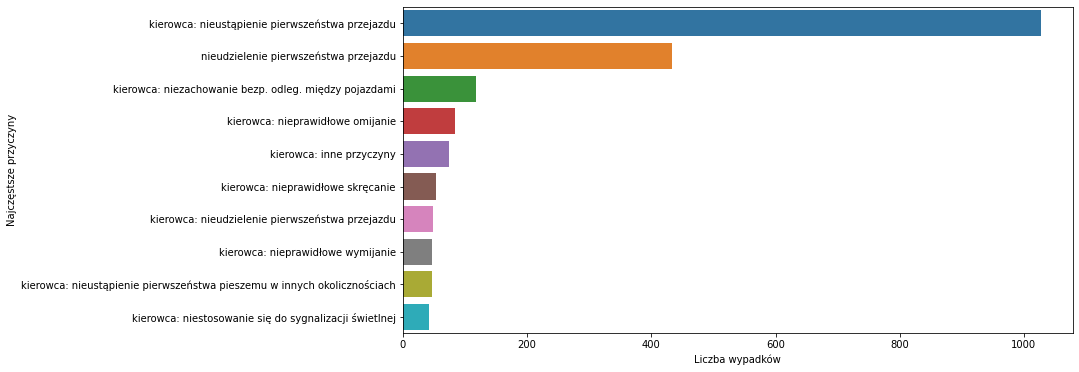

In [14]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=gdf_merged,
    y='PRZYCZYNA',
    order=gdf_merged.PRZYCZYNA.value_counts().iloc[:10].index,
)
ax.set_xlabel('Liczba wypadków')
ax.set_ylabel('Najczęstsze przyczyny')

plt.show()

### Najniebezpieczniejsze typy dróg

In [15]:
from collections import Counter

type_counter = Counter(gdf_bikeroads.TYP.values.tolist())
type_counter = dict(sorted(type_counter.items(), key=lambda x: x[0].lower()))

In [16]:
road_type_length = flatten_multiindex(
    gdf_bikeroads.groupby(by=['TYP']).agg({
        'length': ['sum']
    })
)
road_type_length

,TYP,length_sum
0,droga dla pieszych i rowerów,203954.466102
1,droga dla rowerów,110505.587086
2,kontrapas,5113.905431
3,kontraruch,36029.539979
4,możliwość przejazdu,18782.358288
5,pas BUS + ROWER,896.507707
6,pas ruchu dla rowerów,29674.299961
7,strefa ruchu uspokojonego 20 i 30 km/h,719400.009820
8,trasa na wałach,134379.084350
9,trasa przez park,237199.086324


In [17]:
road_type_group = gdf_merged.groupby(by=['TYP_right']).agg({
    'TYP_right': ['count']
})
road_type_group = flatten_multiindex(road_type_group)
road_type_group = road_type_group.rename(
    columns={
        'TYP_right_count': 'accidents_num',
        'TYP_right': 'road_type'
    },
)
road_type_group['types_num'] = type_counter.values()
road_type_group['types_len'] = road_type_length.length_sum.values

road_type_group['ratio_by_num'] = road_type_group.apply(
    lambda x: x['accidents_num'] / x['types_num'],
    axis=1,
)
road_type_group['ratio_by_len'] = road_type_group.apply(
    lambda x: x['accidents_num'] / x['types_len'],
    axis=1,
)

road_type_group

,road_type,accidents_num,types_num,types_len,ratio_by_num,ratio_by_len
0,droga dla pieszych i rowerów,579,2393,203954.466102,0.241956,0.002839
1,droga dla rowerów,339,1693,110505.587086,0.200236,0.003068
2,kontrapas,23,58,5113.905431,0.396552,0.004498
3,kontraruch,53,320,36029.539979,0.165625,0.001471
4,możliwość przejazdu,44,257,18782.358288,0.171206,0.002343
5,pas BUS + ROWER,2,14,896.507707,0.142857,0.002231
6,pas ruchu dla rowerów,167,525,29674.299961,0.318095,0.005628
7,strefa ruchu uspokojonego 20 i 30 km/h,536,6711,719400.009820,0.079869,0.000745
8,trasa na wałach,12,261,134379.084350,0.045977,0.000089
9,trasa przez park,25,2728,237199.086324,0.009164,0.000105


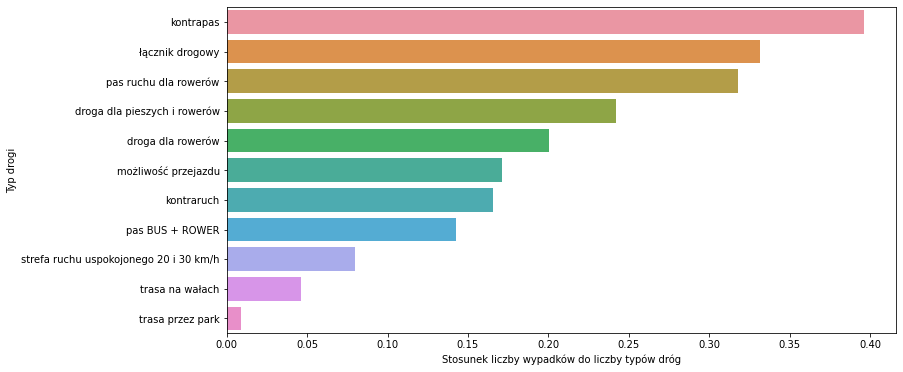

In [18]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=road_type_group,
    x='ratio_by_num',
    y='road_type',
    order=road_type_group.sort_values('ratio_by_num', ascending=False).road_type,
)
ax.set_xlabel('Stosunek liczby wypadków do liczby typów dróg')
ax.set_ylabel('Typ drogi')

plt.show()

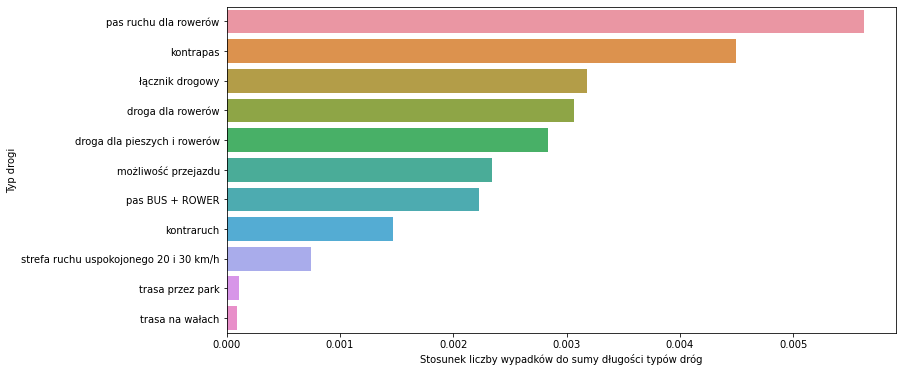

In [19]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=road_type_group,
    x='ratio_by_len',
    y='road_type',
    order=road_type_group.sort_values('ratio_by_len', ascending=False).road_type,
)
ax.set_xlabel('Stosunek liczby wypadków do sumy długości typów dróg')
ax.set_ylabel('Typ drogi')

plt.show()

### Warunki atmosferyczne

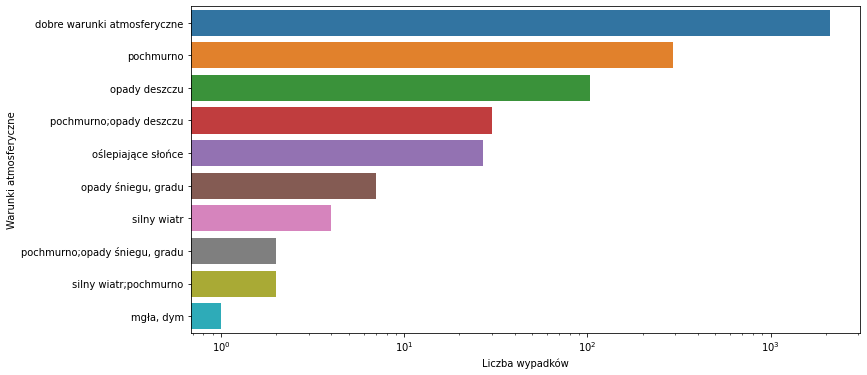

In [64]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=gdf_accidents,
    y='WAR_ATM',
    order=gdf_accidents.WAR_ATM.value_counts().index,
)
ax.set_xscale('log')
ax.set_xlabel('Liczba wypadków')
ax.set_ylabel('Warunki atmosferyczne')

plt.show()

### Liczba wypadków w zależności od czasu

In [61]:
import pandas as pd

gdf_accidents['year'] = gdf_accidents['DATA'].apply(lambda x: x[0:4])
gdf_accidents['month'] = gdf_accidents['DATA'].apply(lambda x: x[5:7])
gdf_accidents['day'] = gdf_accidents['DATA'].apply(lambda x: x[8:10])

gdf_accidents['timestamp'] = pd.to_datetime(gdf_accidents[['year', 'month', 'day']])
gdf_accidents.head()

,POJ_SUMA,POJ_ROWER,POJ_TRAM,POJ_BUS,UCZ_SUMA,UCZ_PIESI,Z_SUMA,Z_PIESI,Z_IN,CR_SUMA,...,OSW,WAR_ATM,USZK_P_POJ,ROK,ShpName,geometry,year,month,day,timestamp
10,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,światło dzienne,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (16.89646 51.13728),2013,08,24,2013-08-24
40,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,światło dzienne,pochmurno,None,2013,2013_szczegoly_zdarzen_dr,POINT (17.04709 51.07854),2013,11,14,2013-11-14
60,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,światło dzienne,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (17.02238 51.10523),2013,04,24,2013-04-24
65,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,światło dzienne,dobre warunki atmosferyczne,None,2013,2013_szczegoly_zdarzen_dr,POINT (16.98138 51.12573),2013,07,19,2013-07-19
77,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,światło dzienne,dobre warunki atmosferyczne,"ogrodzenie, inne",2013,2013_szczegoly_zdarzen_dr,POINT (17.02807 51.11838),2013,06,09,2013-06-09


In [62]:
year_month_group = flatten_multiindex(gdf_accidents[['timestamp']].groupby(
    [gdf_accidents['timestamp'].dt.year.rename('year'),
     gdf_accidents['timestamp'].dt.month.rename('month')],
).agg({'count'}))
year_month_group = year_month_group.rename(columns={
    'timestamp_count': 'accidents_num'
})

year_month_group

,year,month,accidents_num
0,2013,1,3
1,2013,2,4
2,2013,3,5
3,2013,4,12
4,2013,5,17
...,...,...,...
100,2021,5,43
101,2021,6,53
102,2021,7,57
103,2021,8,26


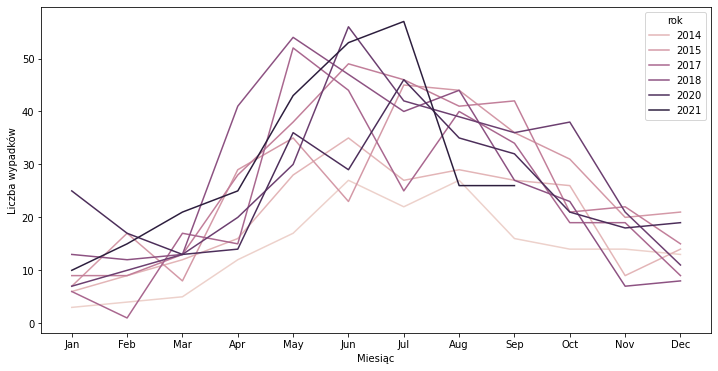

In [69]:
import calendar

year_month_group['month'] = year_month_group['month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=year_month_group,
    x='month',
    hue='year',
    y='accidents_num',
)

ax.set_xlabel('Miesiąc')
ax.set_ylabel('Liczba wypadków')

plt.legend(title='rok')

### Liczba wypadków w zależności od miesiąca i typu drogi

In [80]:
year_month_group_type = flatten_multiindex(gdf_merged[['timestamp', 'TYP_right']].groupby(
    [
        gdf_merged['TYP_right'],
        gdf_merged['timestamp'].dt.month.rename('month'),
     ],
).agg({'timestamp': ['count']}))
year_month_group_type = year_month_group_type.rename(columns={
    'timestamp_count': 'accidents_num',
    'TYP_right': 'road_type',
})


year_month_group_type['month'] = year_month_group_type['month'].apply(lambda x: calendar.month_abbr[x])

year_month_group_type

,road_type,month,accidents_num
0,droga dla pieszych i rowerów,Jan,17
1,droga dla pieszych i rowerów,Feb,17
2,droga dla pieszych i rowerów,Mar,24
3,droga dla pieszych i rowerów,Apr,48
4,droga dla pieszych i rowerów,May,76
...,...,...,...
106,łącznik drogowy,Aug,36
107,łącznik drogowy,Sep,27
108,łącznik drogowy,Oct,12
109,łącznik drogowy,Nov,18


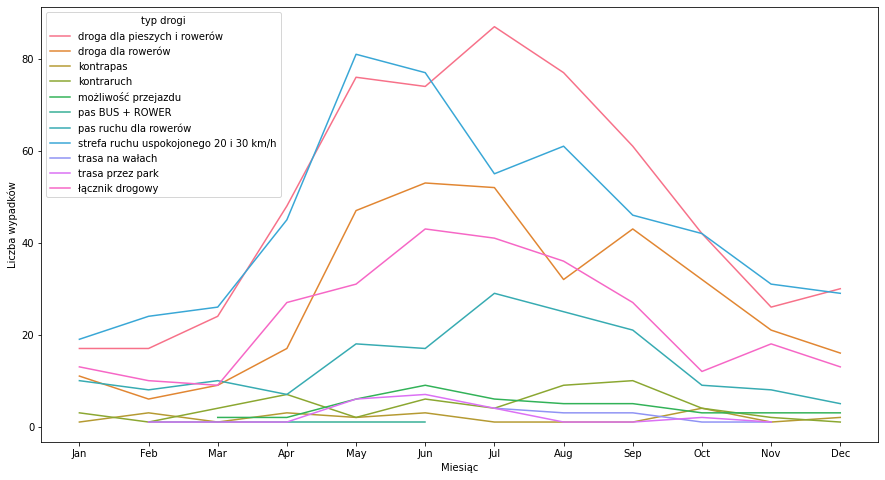

In [81]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    data=year_month_group_type,
    x='month',
    hue='road_type',
    y='accidents_num',
)

ax.set_xlabel('Miesiąc')
ax.set_ylabel('Liczba wypadków')

plt.legend(title='typ drogi')